<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session6/Assignment_6b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, Concatenate, GlobalAveragePooling2D, Input
from keras.layers.advanced_activations import ReLU, Softmax
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


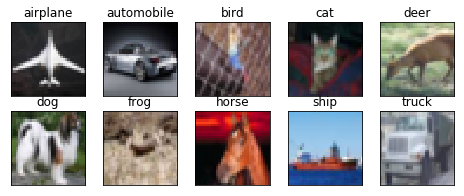

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Fix you


# Solution to assignment 6B

Rewrite using convolutions in the order given below:

1. Normal Convolution
2. Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
3. Depthwise Separable Convolution
4. Grouped Convolution (use 3x3, 5x5 only)
5. Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2)

In [0]:
input = Input(shape=(32, 32, 3,))

#######################
# Block1
#######################
## 32 || 3
#Normal Convoltion
b1_c1 = Conv2D(16, (3,3), padding='same', use_bias=False)(input)
b1_c1 = BatchNormalization()(b1_c1)
b1_c1 = ReLU()(b1_c1)

#Spatially Separable Convolution (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
b1_c2 = Conv2D(16, (3,1), padding='same', use_bias=False)(b1_c1)
b1_c2 = Conv2D(32, (1,3), padding='same',  use_bias=False)(b1_c2)
b1_c2 = BatchNormalization()(b1_c2)
b1_c2 = ReLU()(b1_c2)
b1_c2 = Dropout(0.25)(b1_c2)

# Depthwise Separable Convolution
b1_c3 = SeparableConv2D(64, (3,3), padding='same',  use_bias=False)(b1_c2)
b1_c3 = BatchNormalization()(b1_c3)
b1_c3 = ReLU()(b1_c3)
b1_c3 = Dropout(0.25)(b1_c3)

#########
# Trans1
#########
t1_bottle = Conv2D(32, (1,1), padding='same', use_bias=False)(b1_c3)
t1_bottle = BatchNormalization()(t1_bottle)
t1_bottle = ReLU()(t1_bottle)

t1_mp = MaxPooling2D(pool_size=(2, 2))(t1_bottle)
t1_mp = Dropout(0.25)(t1_mp)
#######################
# Block2
#######################

# Grouped Convolution (use 3x3, 5x5 only)

 #convolution type1
b2_c1_l1 = Conv2D(64, (3,3), padding='same', dilation_rate=(1, 1), use_bias=False)(t1_mp)
b2_c1_l1 = BatchNormalization()(b2_c1_l1)
b2_c1_l1 = ReLU()(b2_c1_l1)
  
  #conolution type2
b2_c1_l2 = Conv2D(64, (5,5), padding='same', dilation_rate=(1, 1), use_bias=False)(t1_mp)
b2_c1_l2 = BatchNormalization()(b2_c1_l2)
b2_c1_l2 = ReLU()(b2_c1_l2)
  
b2_c1_l3 = Concatenate(axis=-1)([b2_c1_l1,b2_c1_l2])
  
  #lowering down the number
b2_c1_l4 = Conv2D(64, (1,1), use_bias=False)(b2_c1_l3)
b2_c1_l4 = BatchNormalization()(b2_c1_l4)
b2_c1_l4 = ReLU()(b2_c1_l4)


#Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2)
  
              
  #convolution type1
b2_c2_l1 = Conv2D(128, (3,3), padding='same', dilation_rate=(1, 2), use_bias=False)(b2_c1_l4)
b2_c2_l1 = BatchNormalization()(b2_c2_l1)
b2_c2_l1 = ReLU()(b2_c2_l1)
  
  #conolution type2
b2_c2_l2 = Conv2D(128, (3,3), padding='same',  dilation_rate=(1, 2), use_bias=False)(b2_c1_l4)
b2_c2_l2 = BatchNormalization()(b2_c2_l2)
b2_c2_l2 = ReLU()(b2_c2_l2)
  
b2_c2_l3 = Concatenate(axis=-1 )([b2_c2_l1,b2_c2_l2])
  
  #lowering down the number
b2_c2_l4 = Conv2D(128, (1,1), use_bias=False)(b2_c2_l3)
b2_c2_l4 = BatchNormalization()(b2_c2_l4)
b2_c2_l4 = ReLU()(b2_c2_l4)
              
              
#########
# Trans2
#########
t2_bottle = Conv2D(64, (1,1), padding='same',use_bias=False)(b2_c2_l4)
t2_bottle = BatchNormalization()(t2_bottle)
t2_bottle = ReLU()(t2_bottle)

t2_mp = MaxPooling2D(pool_size=(2, 2))(t2_bottle)
t2_mp = Dropout(0.25)(t2_mp)

######

reduce_ch = Conv2D(10, (1,1), use_bias=False)(t2_mp)
avg_pool = GlobalAveragePooling2D()(reduce_ch)
output = Softmax()(avg_pool)


model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 32, 32, 16)   432         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 32, 32, 16)   64          conv2d_11[0][0]                  
__________________________________________________________________________________________________
re_lu_11 (ReLU)                 (None, 32, 32, 16)   0           batch_normalization_11[0][0]     
__________________________________________________________________________________________________
conv2d_12 

W0614 06:57:38.969793 139872746272640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  
W0614 06:57:39.137526 139872746272640 deprecation.py:323

Epoch 1/50
390/390 [==============================] - 49s 125ms/step - loss: 1.4773 - acc: 0.4619 - val_loss: 1.7851 - val_acc: 0.3857
Epoch 2/50
390/390 [==============================] - 44s 113ms/step - loss: 1.0634 - acc: 0.6215 - val_loss: 1.2574 - val_acc: 0.5529
Epoch 3/50
390/390 [==============================] - 44s 112ms/step - loss: 0.9255 - acc: 0.6718 - val_loss: 0.9454 - val_acc: 0.6604
Epoch 4/50
390/390 [==============================] - 44s 112ms/step - loss: 0.8316 - acc: 0.7072 - val_loss: 1.2124 - val_acc: 0.5612
Epoch 5/50
390/390 [==============================] - 44s 112ms/step - loss: 0.7557 - acc: 0.7355 - val_loss: 0.9754 - val_acc: 0.6464
Epoch 6/50
390/390 [==============================] - 44s 112ms/step - loss: 0.6870 - acc: 0.7590 - val_loss: 1.0344 - val_acc: 0.6423
Epoch 7/50
390/390 [==============================] - 44s 113ms/step - loss: 0.6398 - acc: 0.7757 - val_loss: 0.8573 - val_acc: 0.6913
Epoch 8/50
390/390 [==============================] - 4

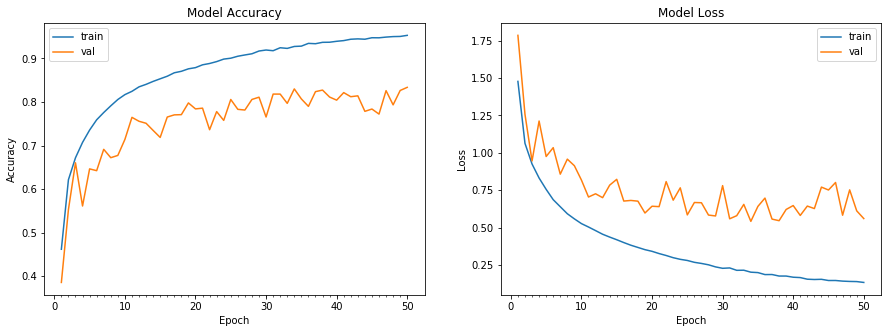

Accuracy on test data is: 83.36


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))